In [34]:
import numpy as np #import numpy library which support multi-dim arrays and various mathematical un.

import pandas as pd #importing pandas library which contain many functions that helps in handling
 # data specially in the tubular form

import matplotlib.pyplot as plt #importing pyplot module from matplot lib which include a ranfe of plotting fn
import seaborn as sns #importing seaborn lib that is capable of creating attractive and informative star graphics

import random #importing random module that is responsible for generating random numbrers

from scipy.stats import zscore #importing zscore fn from scipy.stats lib which calc the zscore for data set
# and measure how many standard deviation a data point is away from the mean



sns.set_style("darkgrid")

In [35]:
#read_csv() is a function used to read data from a CSV file and create a DataFrame.
data= pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Getting the Columns and printint them

In [36]:
columns = data.columns # getting the columns name of the dataset

print("Columns in the dataset:")
for column in columns:
    print(column) # printing every columns in the data set

Columns in the dataset:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


## divide data into categorical and quantitative

In [37]:
variable_types = {} # variable that conatin every column and its type

for column in data.columns: # iterating over the columns
    values = data[column].unique()

    if data[column].dtype in ['int64', 'float64']: #separating between the Categorical and Quantitative
        if set(values) == {0, 1}:
            variable_types[column] = 'Categorical'
        else:
            variable_types[column] = 'Quantitative'
    else:
        variable_types[column] = 'categorical'

for column, variable_type in variable_types.items():
    print(f"Column '{column}' is {variable_type}") # printing every column with its type



Column 'age' is Quantitative
Column 'sex' is Categorical
Column 'cp' is Quantitative
Column 'trestbps' is Quantitative
Column 'chol' is Quantitative
Column 'fbs' is Categorical
Column 'restecg' is Quantitative
Column 'thalach' is Quantitative
Column 'exang' is Categorical
Column 'oldpeak' is Quantitative
Column 'slope' is Quantitative
Column 'ca' is Quantitative
Column 'thal' is Quantitative
Column 'target' is Categorical


## Using the z-score to remove the outliers

In [38]:
z_scores = zscore(data) # getting the z-score of the data
threshold = 3.6
outlier_indices = np.where(np.abs(z_scores) > threshold)[0] # getting the outliers where the outliers have z-score greater than the threshold so they are so far

mask = np.zeros(len(data), dtype=bool)
mask[outlier_indices] = True # making a table that have True where the outliers are

data_without_outliers = data.loc[~mask] # deleting the outliers from the original data
data_without_outliers.reset_index(drop=True, inplace=True) # reseting the data to the new size

print("Indices of removed outliers:", outlier_indices)

print("Shape of outlier-removed dataset:", data_without_outliers.shape)
print(data_without_outliers)
# print(data)


Indices of removed outliers: [ 48  85 204 221 223 281]
Shape of outlier-removed dataset: (297, 14)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   57    0   0       140   241    0        1      123      1      0.2   
293   45    1   3       110   264    0        1      132      0      1.2   
294   68    1   0       144   193    1        1      141      0      3.4   
295   57    1   0       130   131    0        1      115      1      1.2   
296   57    0   1       130   236    0        0      174      0  

## using IQR for removing outliers

In [39]:
# Specify the multiple of IQR to determine outliers
iqr_multiplier = 1.5

for column in data.columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)

    iqr = q3 - q1

    lower = q1 - (iqr_multiplier * iqr)
    upper = q3 + (iqr_multiplier * iqr)

    outliers = data[(data[column] < lower) | (data[column] > upper)]
    data_without_outlier = data.drop(outliers.index)  #used to remove the outliers
print("Shape of outlier-removed dataset:", data_without_outlier.shape)


Shape of outlier-removed dataset: (303, 14)


## Compare between the original data and data_without_outliers

Original Data:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.5

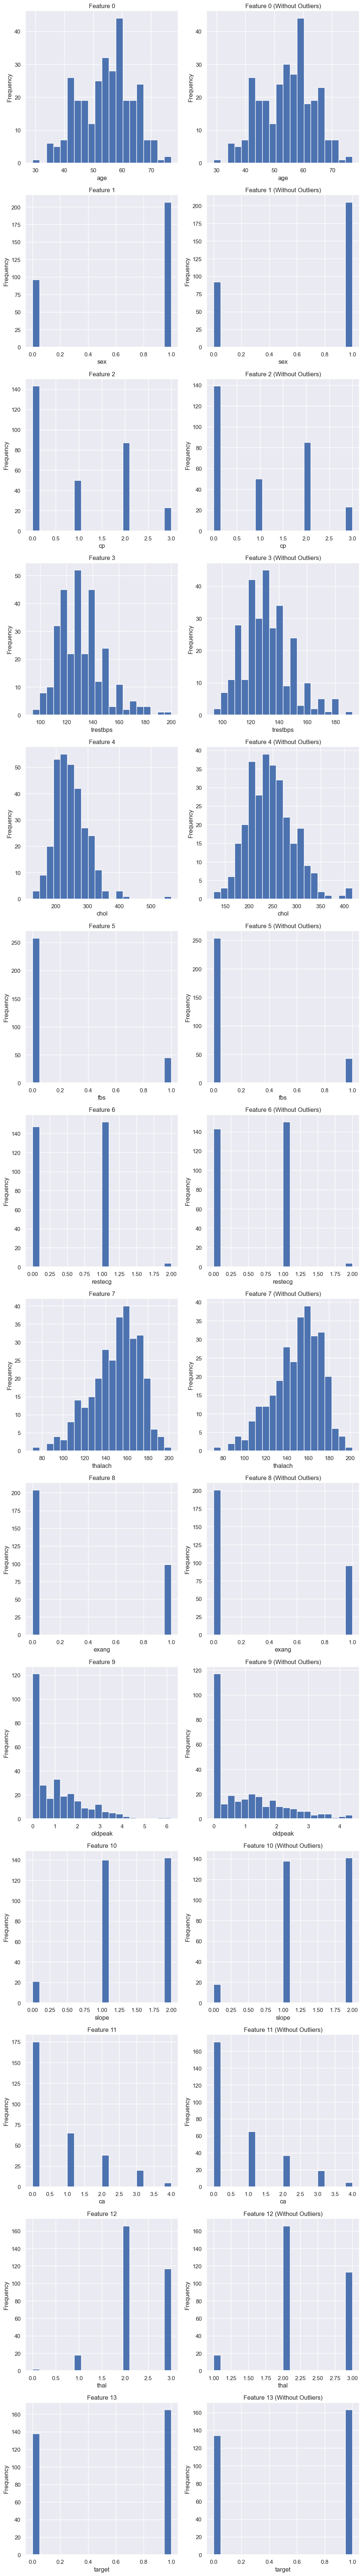

In [40]:
# making the old data and new data into a Dataframe for comparison and plotting
data_df = pd.DataFrame(data)
data_without_outliers_df = pd.DataFrame(data_without_outliers)

print("Original Data:")
print(data_df.describe())

print("\nData after Outlier Removal:")
print(data_without_outliers_df.describe())

num_features = data.shape[1] # getting number of features/columns

fig, axs = plt.subplots(num_features, 2, figsize=(10, num_features*5))

for i in range(num_features): # iterating over every column and comparing the old data with the new data after removing the outliers
    axs[i, 0].hist(data_df.iloc[:, i], bins=20)
    axs[i, 0].set_title("Feature {}".format(i))
    axs[i, 0].set_ylabel("Frequency")
    axs[i, 0].set_xlabel(data_df.columns[i])

    axs[i, 1].hist(data_without_outliers_df.iloc[:, i], bins=20)
    axs[i, 1].set_title("Feature {} (Without Outliers)".format(i))
    axs[i, 1].set_ylabel("Frequency")
    axs[i, 1].set_xlabel(data_without_outliers_df.columns[i])

plt.tight_layout()
plt.show()



Dividing columns into quantitative and categorical
---

In [41]:
def quant_vs_cat (data):
  quantitative = []
  categorical = []
  for column in data.columns:
      values = data[column].unique()  #determine our unique values in the data

      if data[column].dtype in ['int64', 'float64']:  #checking if the data type is int or float
          if set(values) == {0, 1}:    #if the data value is only {0,1} it is considered categorcial
              categorical.append(column)
          else:
              quantitative.append(column)
      else:
          categorical.append(column)
  return quantitative , categorical

quantitative , categorical = quant_vs_cat(data_without_outliers)
print("Quantitative Variables:", quantitative)
print("Categorical Variables:", categorical)


Quantitative Variables: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
Categorical Variables: ['sex', 'fbs', 'exang', 'target']


## Calculate Measures of Central Tendency By Getting the Mean, Median and Mode

---



In [42]:
mean_values = data_without_outliers.mean()  #mean calculation

median_values = data_without_outliers.median()  #median calculation

mode_values = data_without_outliers.mode().iloc[0]  #mode calculation , .iloc[0] is used to select the first row from the resulting DataFrame

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)

Mean values:
age          54.303030
sex           0.690236
cp            0.973064
trestbps    131.350168
chol        245.673401
fbs           0.144781
restecg       0.531987
thalach     149.909091
exang         0.323232
oldpeak       0.998653
slope         1.414141
ca            0.727273
thal          2.319865
target        0.548822
dtype: float64

Median values:
age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.7
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Mode values:
age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        197.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64


## Calculate Measures of Dispersion for each column which is range,varience , std deviation and IQR

In [43]:
data_std_dev = data_without_outliers.std()  #standard deviation calculation

data_variance = data_without_outliers.var()  #variance calculation

data_range = data_without_outliers.max() - data_without_outliers.min()  #range calculation

q1 = data_without_outliers.quantile(0.25)
q3 = data_without_outliers.quantile(0.75)
data_iqr = q3 - q1
#Interquartile Range(iqr) range between the first quartile (Q1) and the third quartile (Q3) in a dataset.

print(f"Data Satndard Deviation is :\n{data_std_dev}")
print(f"\nData Variance is :\n{data_variance}")
print(f"\nData Range is :\n{data_range}")
print(f"\nData IQR is :\n{data_iqr}")

Data Satndard Deviation is :
age          9.131311
sex          0.463177
cp           1.032879
trestbps    17.145599
chol        48.566384
fbs          0.352474
restecg      0.526161
thalach     22.904218
exang        0.468500
oldpeak      1.085904
slope        0.604210
ca           1.018261
thal         0.583016
target       0.498451
dtype: float64

Data Variance is :
age           83.380835
sex            0.214533
cp             1.066840
trestbps     293.971562
chol        2358.693648
fbs            0.124238
restecg        0.276845
thalach      524.603194
exang          0.219492
oldpeak        1.179187
slope          0.365070
ca             1.036855
thal           0.339908
target         0.248453
dtype: float64

Data Range is :
age          48.0
sex           1.0
cp            3.0
trestbps     98.0
chol        291.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       4.4
slope         2.0
ca            4.0
thal          2.0
target        1.0
dtype: f

## Standarization: (data-mean)/std

In [44]:
def standardizing_data(data): #declaring a fn that standerdize data by subtracting data from mean and dividing it by std
 data_standerdized =(data-np.mean(data, axis=0) )/np.std(data,axis=0)
 return data_standerdized

data_standerdized=standardizing_data(data_without_outliers)

print (f"mean of standarized data is {np.mean(data_standerdized,axis=0)}")
print (f"standered deviation  of standarized data is {np.std(data_standerdized,axis=0)}")


mean of standarized data is age        -1.674680e-16
sex         9.569599e-17
cp         -2.392400e-17
trestbps   -5.861379e-16
chol        1.884015e-16
fbs        -4.186700e-17
restecg    -4.186700e-17
thalach     9.569599e-17
exang      -9.569599e-17
oldpeak    -2.392400e-17
slope      -2.392400e-17
ca         -2.392400e-17
thal       -4.067080e-16
target     -1.913920e-16
dtype: float64
standered deviation  of standarized data is age         1.0
sex         1.0
cp          1.0
trestbps    1.0
chol        1.0
fbs         1.0
restecg     1.0
thalach     1.0
exang       1.0
oldpeak     1.0
slope       1.0
ca          1.0
thal        1.0
target      1.0
dtype: float64


## Splitting Data into (Train & Test)


In [45]:
from sklearn.model_selection import train_test_split #we use this function to split the dataset into two subsets of sets one used to train our model and the other is used for testing
X_train, X_test, y_train, y_test = train_test_split(data_without_outliers,  data_without_outliers["target"] , test_size=0.2, random_state=135)
#train is 80% of our data , while the test is 20%

print(f"X-Training size is : {len(X_train)}")
print(f"Y-Training size is : {len(y_train)}")

print(f"X-Test size is : {len(X_test)}")
print(f"Y-Test size is : {len(y_test)}")

X-Training size is : 237
Y-Training size is : 237
X-Test size is : 60
Y-Test size is : 60


## Plot the histogram/distribution.

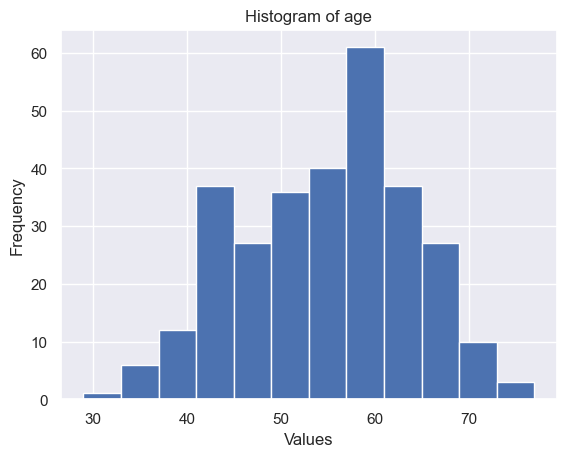

--------------------------------------------------------------------------


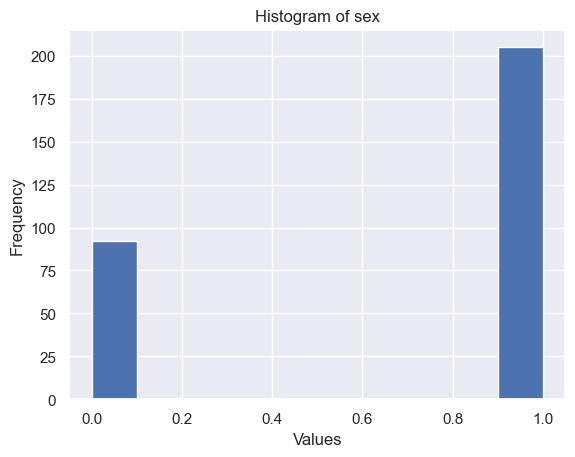

--------------------------------------------------------------------------


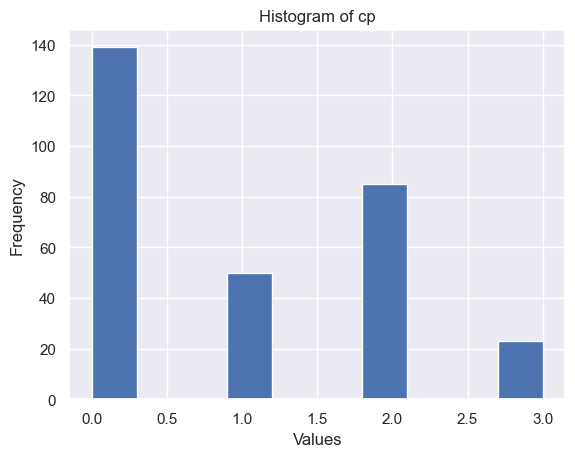

--------------------------------------------------------------------------


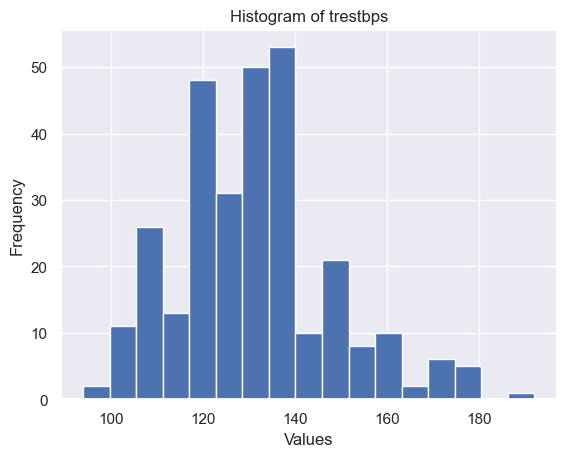

--------------------------------------------------------------------------


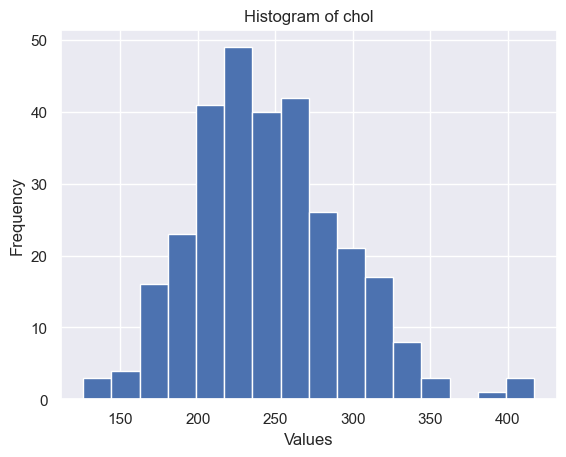

--------------------------------------------------------------------------


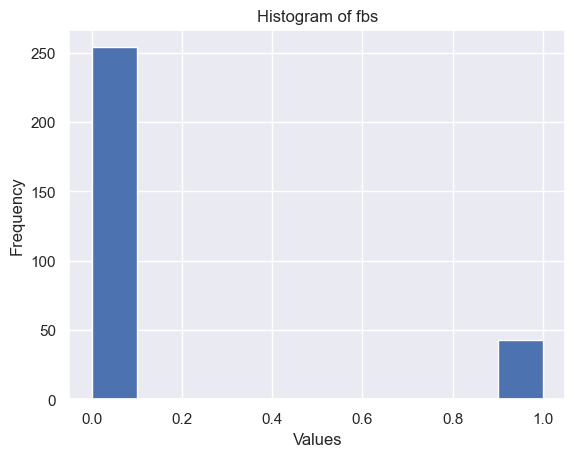

--------------------------------------------------------------------------


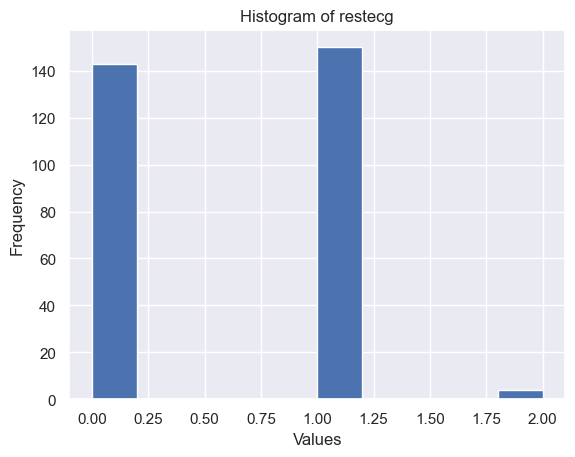

--------------------------------------------------------------------------


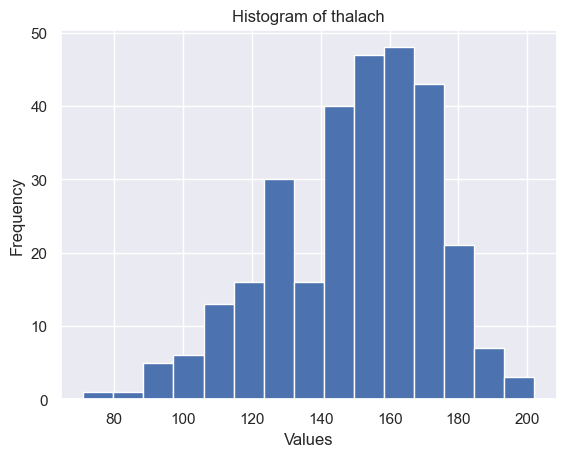

--------------------------------------------------------------------------


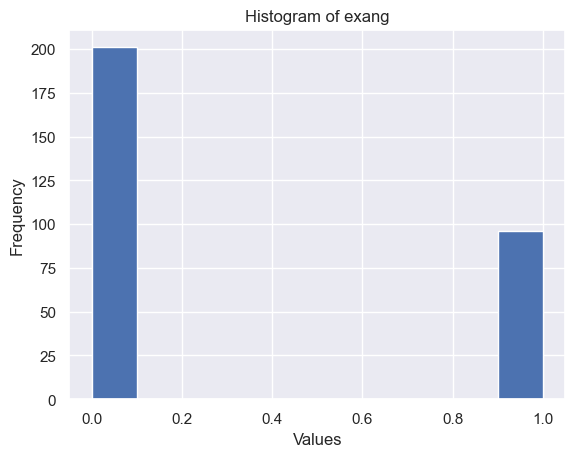

--------------------------------------------------------------------------


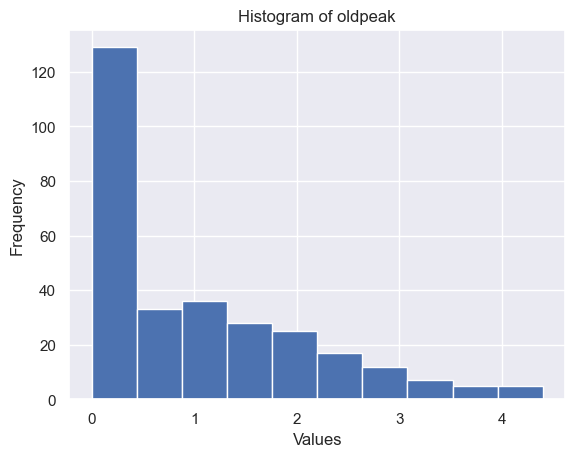

--------------------------------------------------------------------------


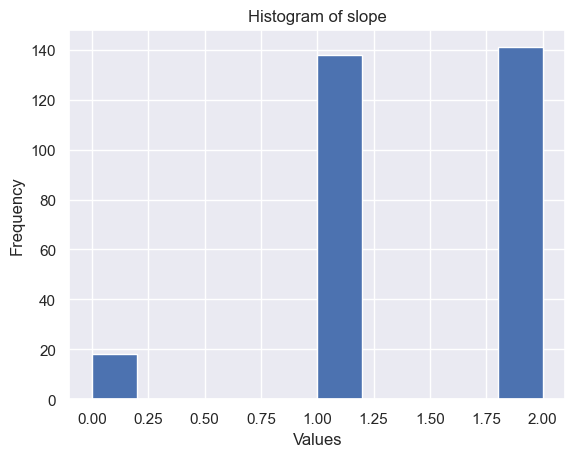

--------------------------------------------------------------------------


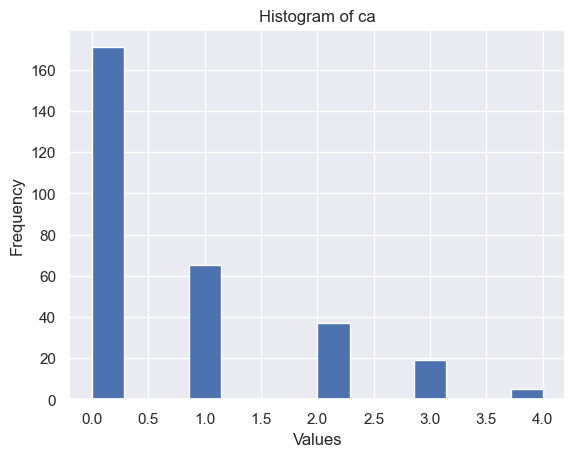

--------------------------------------------------------------------------


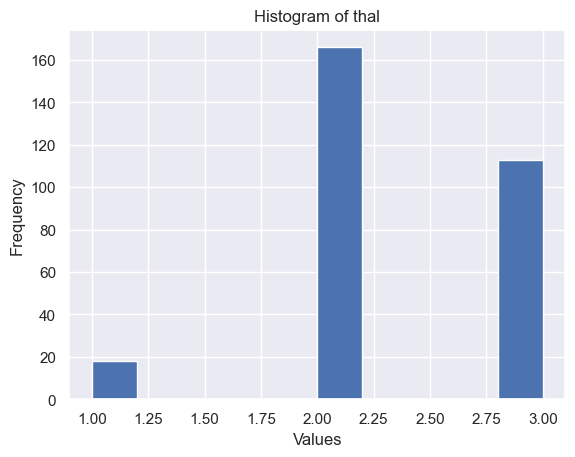

--------------------------------------------------------------------------


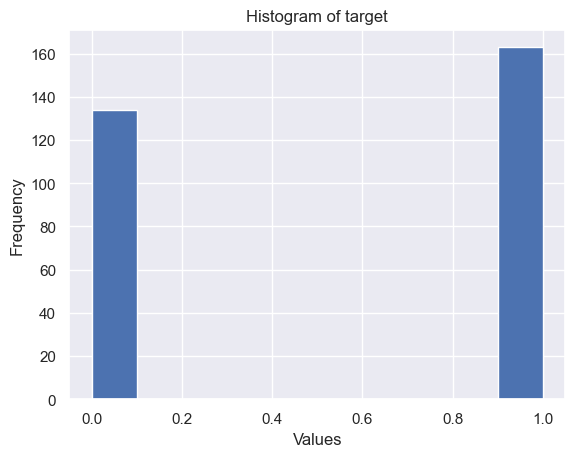

--------------------------------------------------------------------------


In [46]:
#using hist function to plot the histogram of every feautue
for column in data_without_outliers.columns:
  plt.hist(data_without_outliers[column] , bins= 'auto')
  plt.title("Histogram of " + column)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()
  print("--------------------------------------------------------------------------")


## Comment on the type of each distribution (Gaussian, exponential, uniform, etc)

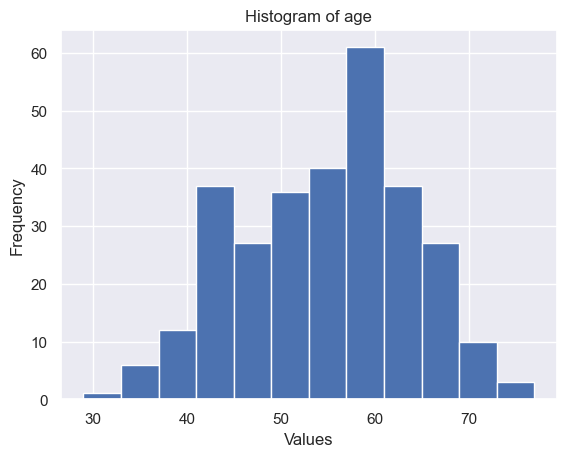

The age feature is skewed left  
--------------------------------------------------------------------------


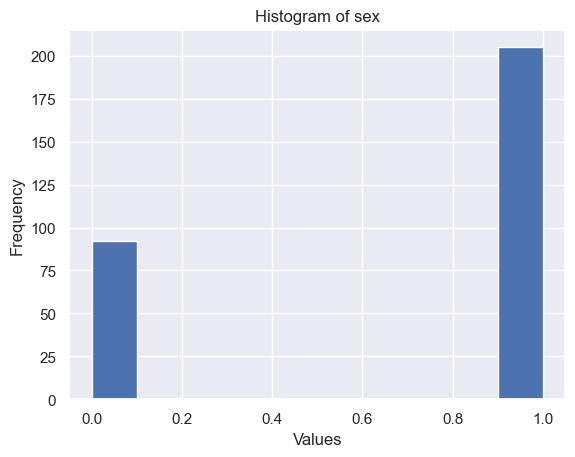

The sex feature is discrete
--------------------------------------------------------------------------


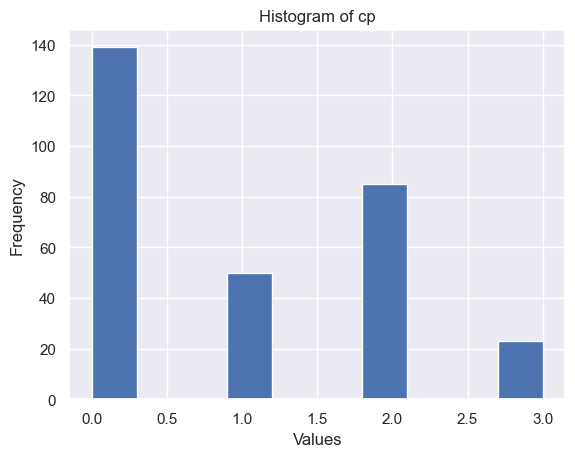

The cp feature is discrete
--------------------------------------------------------------------------


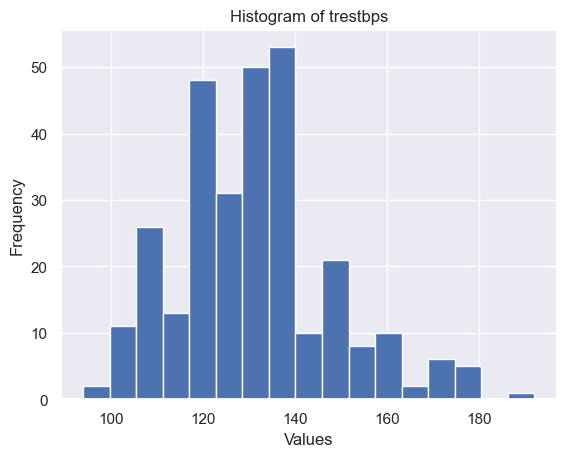

The trestbps feature is skewed right
--------------------------------------------------------------------------


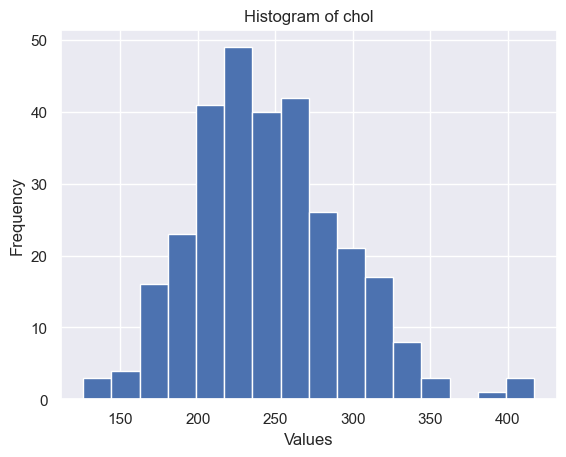

the chol feature follows gaussian distribution
--------------------------------------------------------------------------


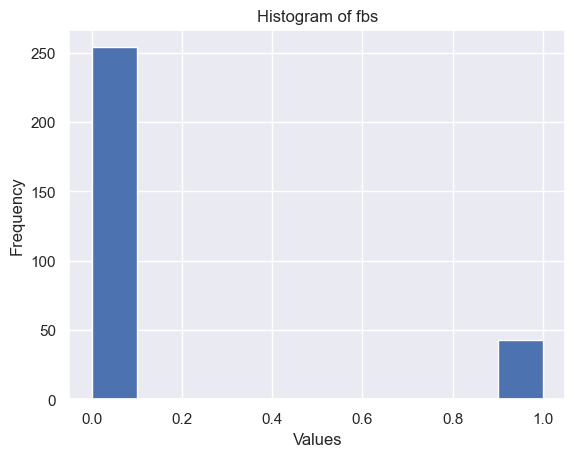

The fbs feature is discrete
--------------------------------------------------------------------------


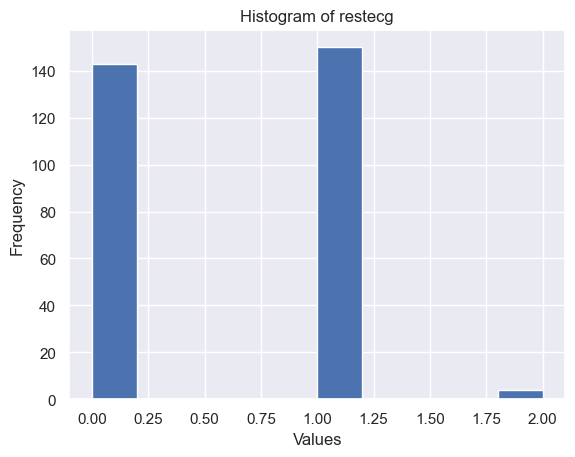

The restecg feature is discrete 
--------------------------------------------------------------------------


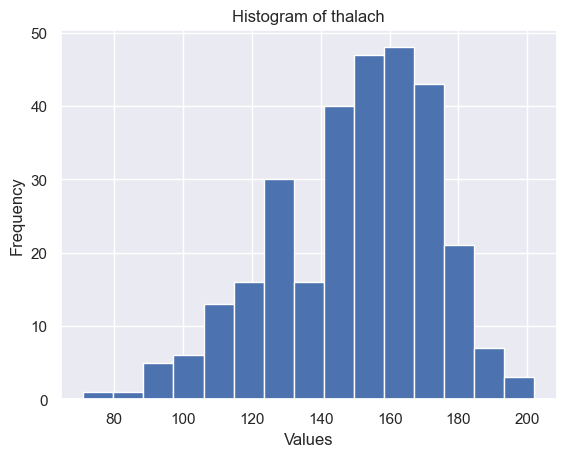

The thalach feature is skewed left
--------------------------------------------------------------------------


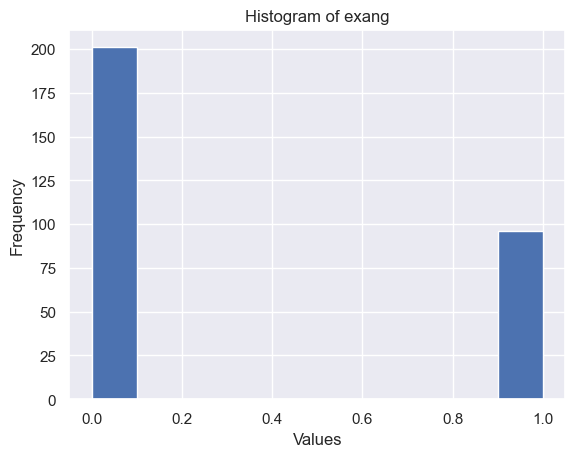

The exang feature is discrete
--------------------------------------------------------------------------


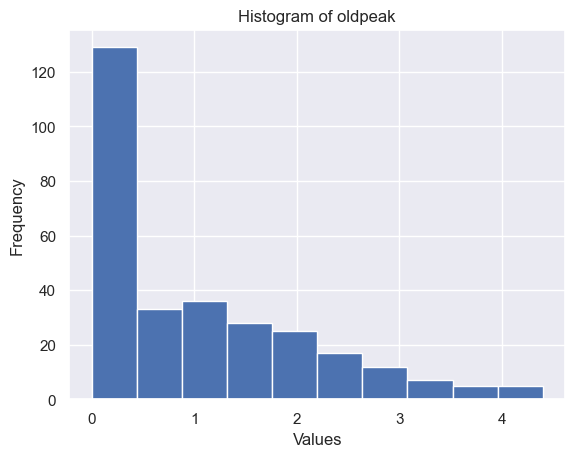

The oldpeak feature is exponential
--------------------------------------------------------------------------


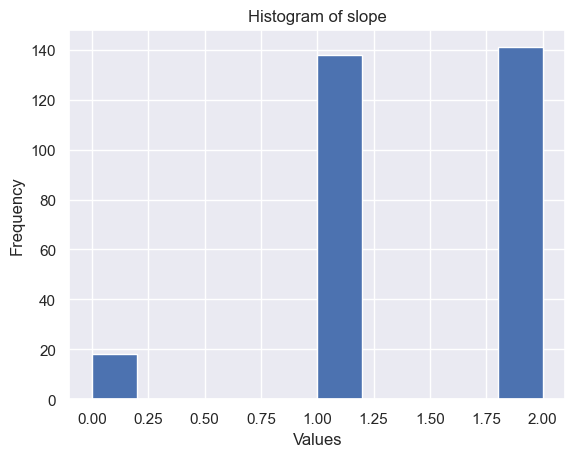

The slope feature is discrete
--------------------------------------------------------------------------


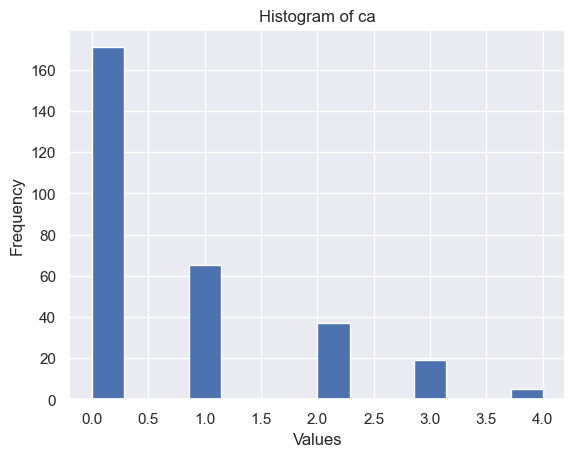

The ca feature is exponential
--------------------------------------------------------------------------


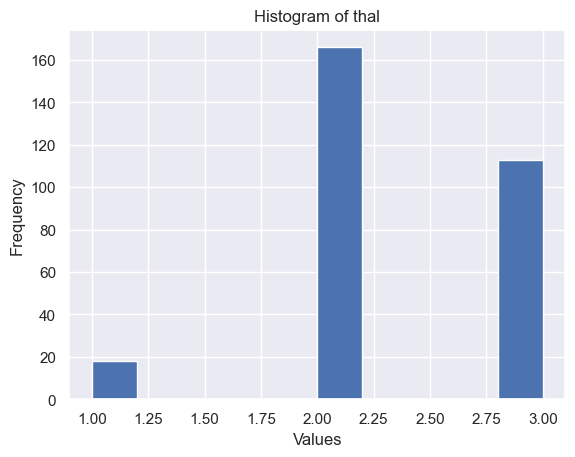

The thal feature is dicrete
--------------------------------------------------------------------------


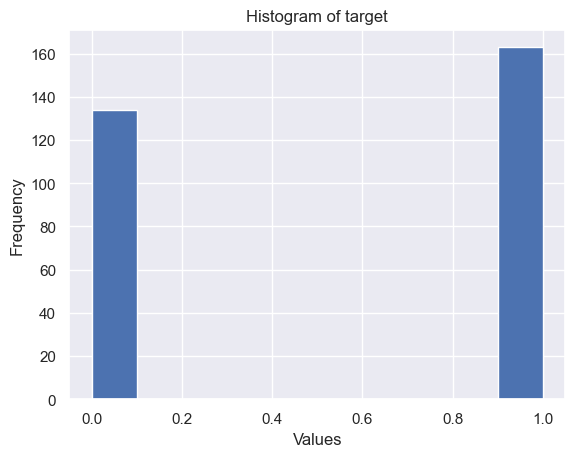

The target feature is discrete
--------------------------------------------------------------------------


In [47]:
# building a string list containing the type of each distribution
#now every histogram is printed whith the type of its distribution
features_type = list([
    "The age feature is skewed left  " ,
    "The sex feature is discrete" ,
    "The cp feature is discrete" ,
    "The trestbps feature is skewed right" ,
    "the chol feature follows gaussian distribution" ,
    "The fbs feature is discrete" ,
    "The restecg feature is discrete " ,
    "The thalach feature is skewed left" ,
    "The exang feature is discrete" ,
    "The oldpeak feature is exponential" ,
    "The slope feature is discrete" ,
    "The ca feature is exponential" ,
    "The thal feature is dicrete" ,
    "The target feature is discrete"
])
for column , features_types in zip(data_without_outliers.columns , features_type):
  plt.hist(data_without_outliers[column] , bins= 'auto')
  plt.title("Histogram of " + column)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()
  print(f'{features_types}')
  print("--------------------------------------------------------------------------")

## Statistically test if a feature/column is normally distributed. You need to search for a statistical test and explain its null and alternative hypotheses

Feature: age
Shapiro-Wilk test statistic: 0.9860110878944397
p-value: 0.005523184314370155
The data is not normally distributed (reject H0).


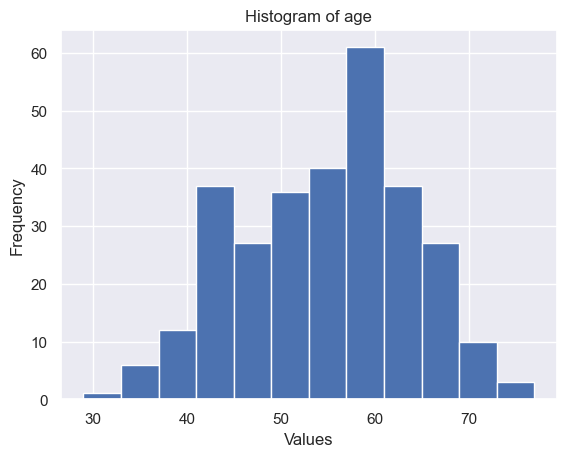

--------------------------------------------------------------------------
Feature: sex
Shapiro-Wilk test statistic: 0.581555962562561
p-value: 3.7117477149483225e-26
The data is not normally distributed (reject H0).


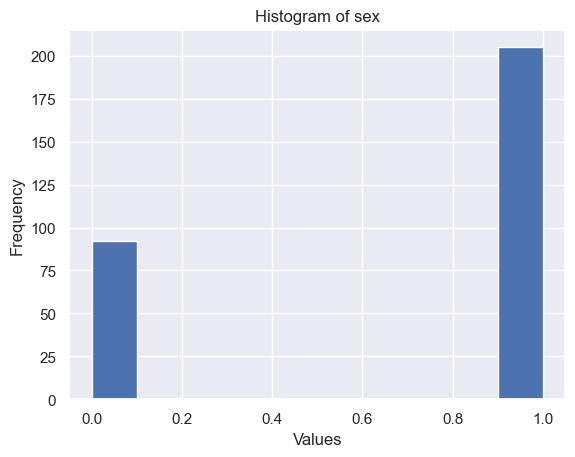

--------------------------------------------------------------------------
Feature: cp
Shapiro-Wilk test statistic: 0.7925691604614258
p-value: 3.7284465592246467e-19
The data is not normally distributed (reject H0).


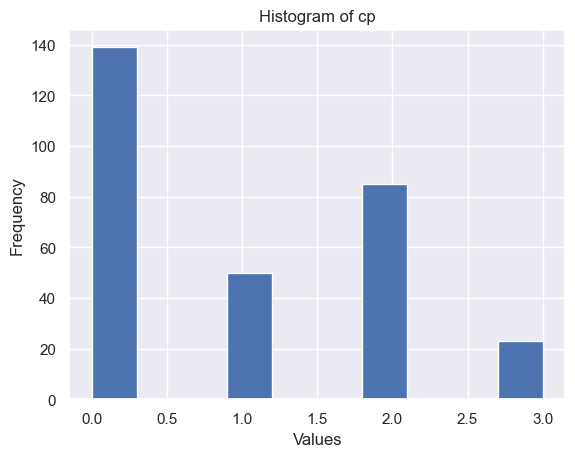

--------------------------------------------------------------------------
Feature: trestbps
Shapiro-Wilk test statistic: 0.9715373516082764
p-value: 1.289320698560914e-05
The data is not normally distributed (reject H0).


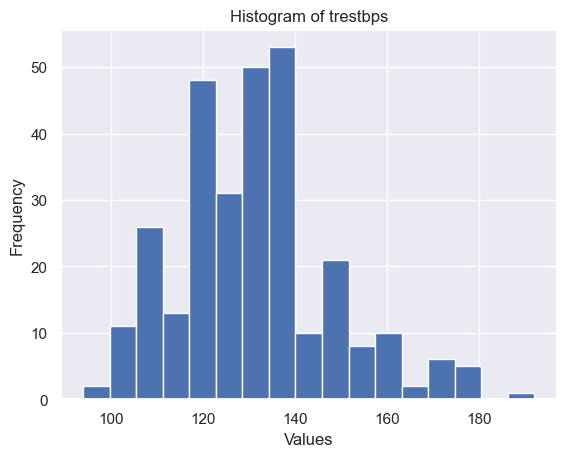

--------------------------------------------------------------------------
Feature: chol
Shapiro-Wilk test statistic: 0.9828683733940125
p-value: 0.0012776604853570461
The data is not normally distributed (reject H0).


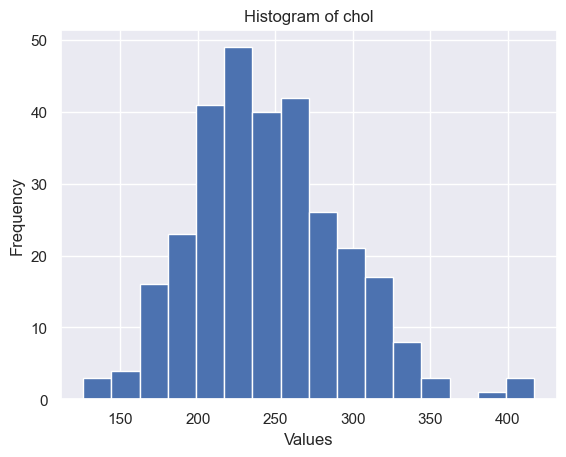

--------------------------------------------------------------------------
Feature: fbs
Shapiro-Wilk test statistic: 0.41847044229507446
p-value: 7.652606650067845e-30
The data is not normally distributed (reject H0).


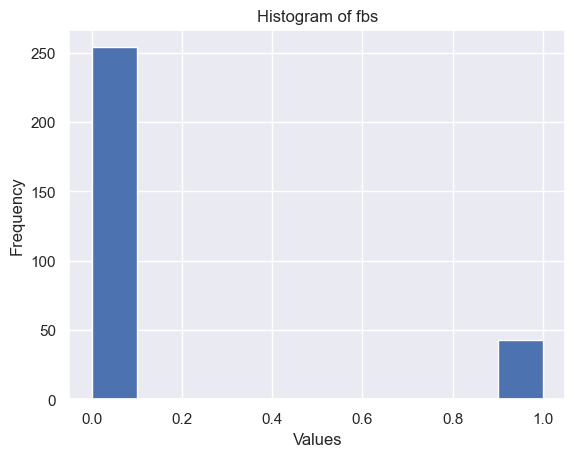

--------------------------------------------------------------------------
Feature: restecg
Shapiro-Wilk test statistic: 0.6799611449241638
p-value: 2.411304975874006e-23
The data is not normally distributed (reject H0).


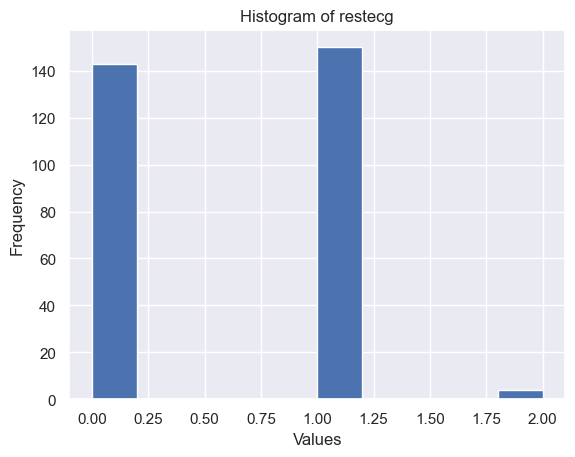

--------------------------------------------------------------------------
Feature: thalach
Shapiro-Wilk test statistic: 0.975622832775116
p-value: 6.045573900337331e-05
The data is not normally distributed (reject H0).


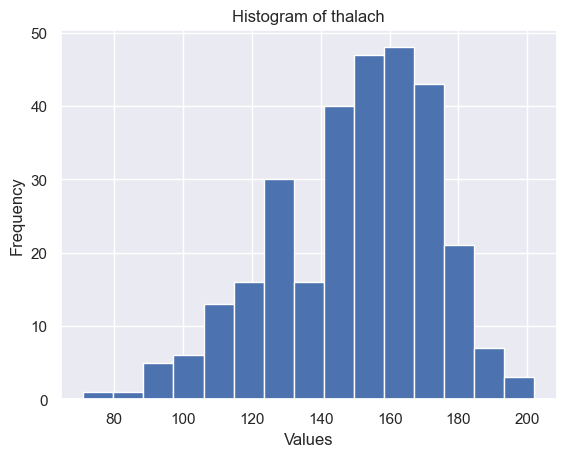

--------------------------------------------------------------------------
Feature: exang
Shapiro-Wilk test statistic: 0.5893452167510986
p-value: 5.91911919471271e-26
The data is not normally distributed (reject H0).


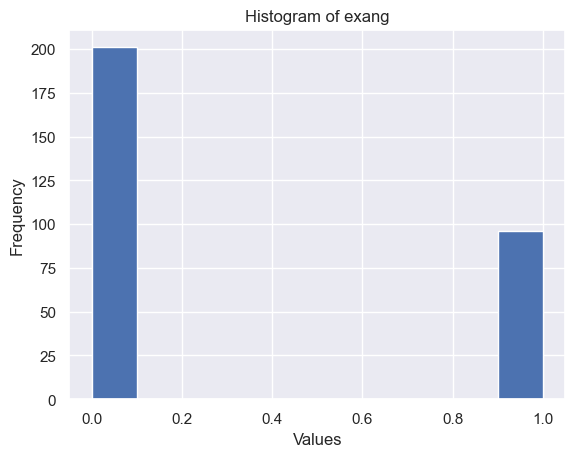

--------------------------------------------------------------------------
Feature: oldpeak
Shapiro-Wilk test statistic: 0.8542540669441223
p-value: 4.499272256203353e-16
The data is not normally distributed (reject H0).


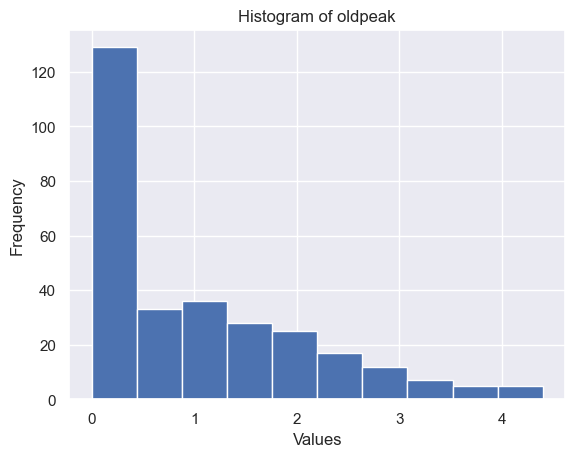

--------------------------------------------------------------------------
Feature: slope
Shapiro-Wilk test statistic: 0.737898588180542
p-value: 2.3271987403065678e-21
The data is not normally distributed (reject H0).


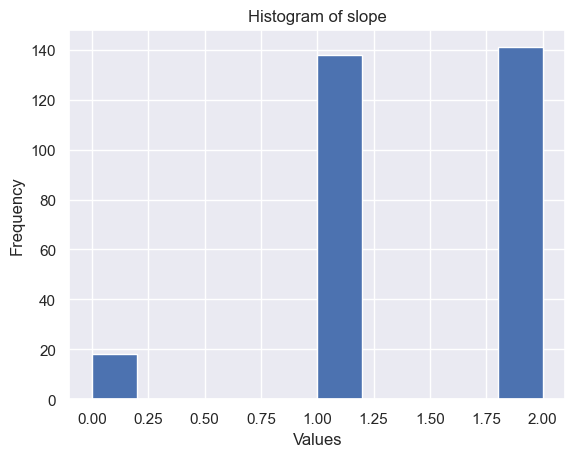

--------------------------------------------------------------------------
Feature: ca
Shapiro-Wilk test statistic: 0.7286996841430664
p-value: 1.073487877302309e-21
The data is not normally distributed (reject H0).


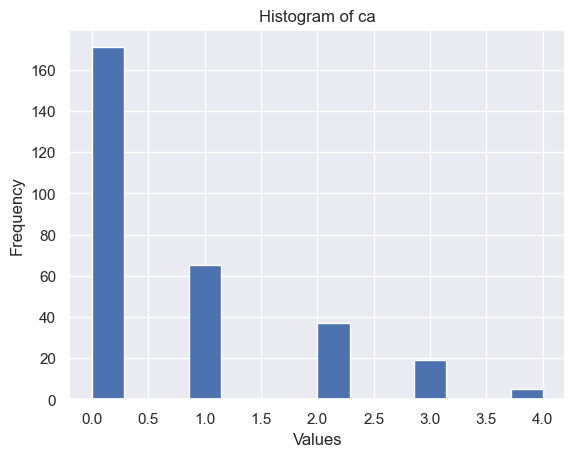

--------------------------------------------------------------------------
Feature: thal
Shapiro-Wilk test statistic: 0.7406346201896667
p-value: 2.9410687387587413e-21
The data is not normally distributed (reject H0).


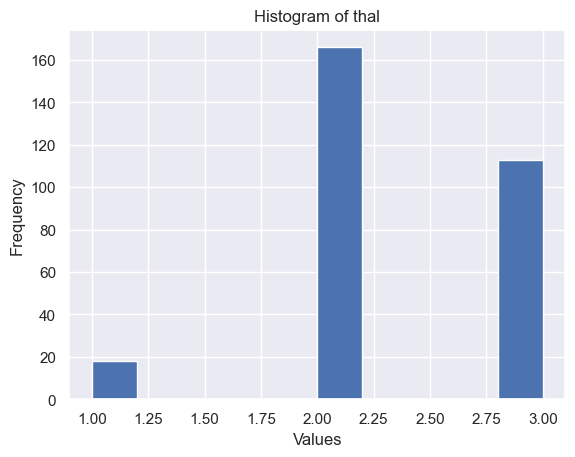

--------------------------------------------------------------------------
Feature: target
Shapiro-Wilk test statistic: 0.6330085396766663
p-value: 9.275401871685369e-25
The data is not normally distributed (reject H0).


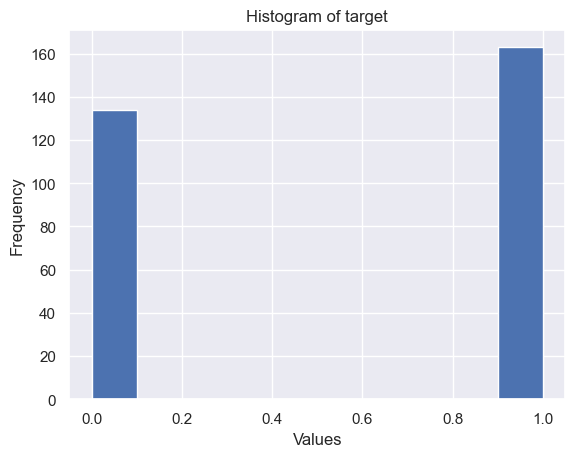

--------------------------------------------------------------------------


In [48]:
import scipy.stats as stats

for column in data_without_outliers.columns:
  # Perform Shapiro-Wilk test for normality
  statistic, p_value = stats.shapiro(data_without_outliers[column])

  # Set significance level
  alpha = 0.05

  print("Feature:", column)
  print("Shapiro-Wilk test statistic:", statistic)
  print("p-value:", p_value)

  # Check the result of the test
  # Ho is that the data is normally distributed , while Ha is that the data is not normally distributed.
  if p_value > alpha:
      print("The data is normally distributed (fail to reject H0).")
  else:
      print("The data is not normally distributed (reject H0).")

  plt.hist(data_without_outliers[column] , bins= 'auto')
  plt.title("Histogram of " + column)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()
  print("--------------------------------------------------------------------------")


## Plot the conditional distributions of each feature on each target class (label).

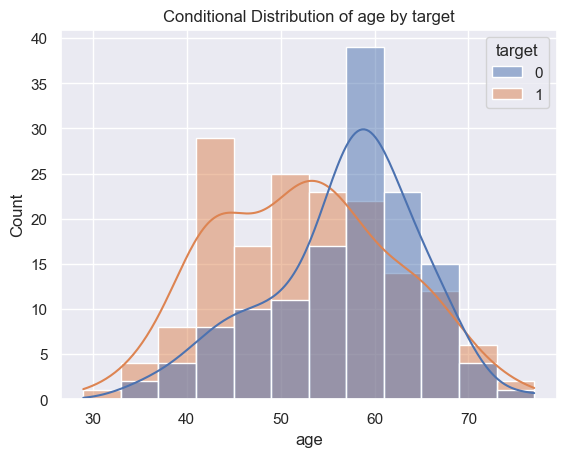

class 0 statistics:
 count    134.00000
mean      56.61194
std        8.05611
min       35.00000
25%       52.00000
50%       58.00000
75%       62.00000
max       77.00000
Name: age, dtype: float64
class 1 statistics:
 count    163.000000
mean      52.404908
std        9.541099
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64
t-test p-value: 6.482325531369358e-05
--------------------------------------------------------------------------


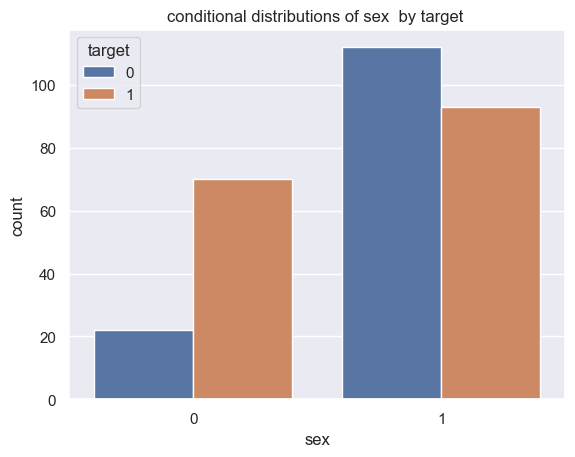

--------------------------------------------------------------------------


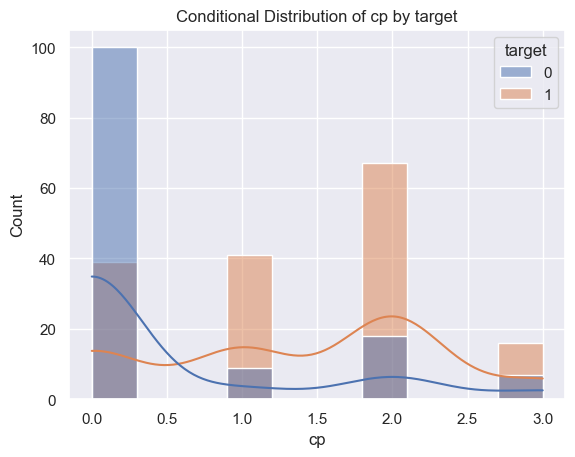

class 0 statistics:
 count    134.000000
mean       0.492537
std        0.915582
min        0.000000
25%        0.000000
50%        0.000000
75%        0.750000
max        3.000000
Name: cp, dtype: float64
class 1 statistics:
 count    163.000000
mean       1.368098
std        0.955537
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64
t-test p-value: 2.7313697061538348e-14
--------------------------------------------------------------------------


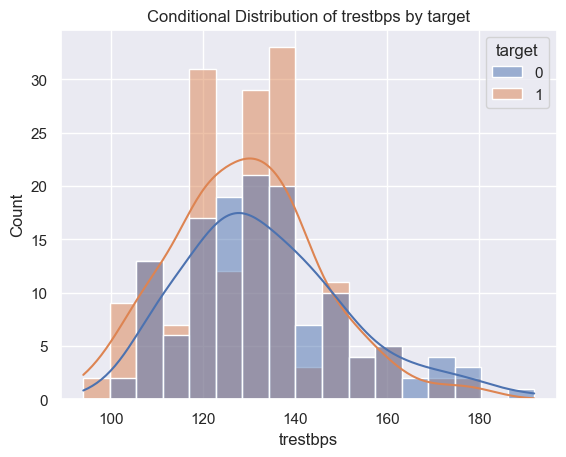

class 0 statistics:
 count    134.000000
mean     133.723881
std       17.974247
min      100.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      192.000000
Name: trestbps, dtype: float64
class 1 statistics:
 count    163.000000
mean     129.398773
std       16.229656
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps, dtype: float64
t-test p-value: 0.030280957667736356
--------------------------------------------------------------------------


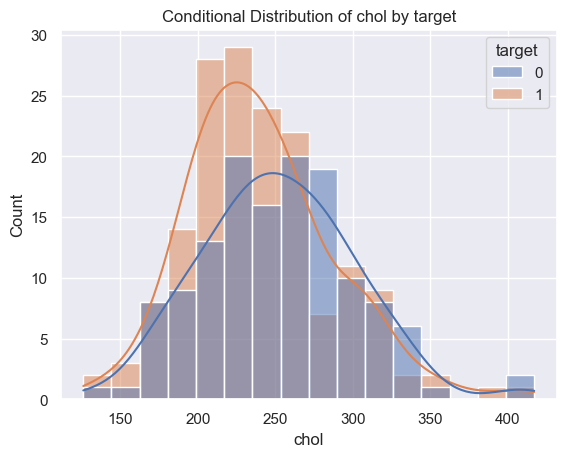

class 0 statistics:
 count    134.000000
mean     252.067164
std       49.251113
min      131.000000
25%      218.250000
50%      251.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64
class 1 statistics:
 count    163.000000
mean     240.417178
std       47.504232
min      126.000000
25%      208.000000
50%      234.000000
75%      266.500000
max      417.000000
Name: chol, dtype: float64
t-test p-value: 0.03946683494719381
--------------------------------------------------------------------------


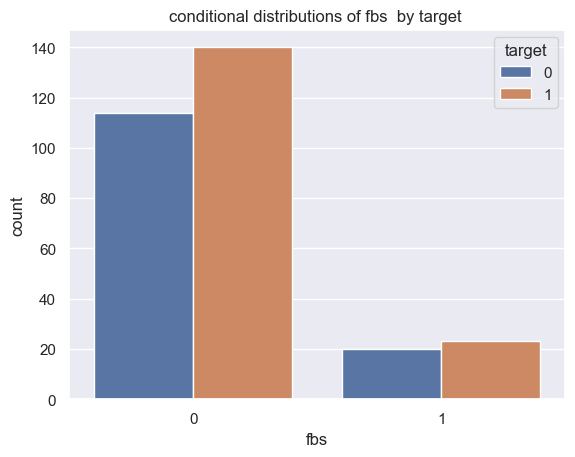

--------------------------------------------------------------------------


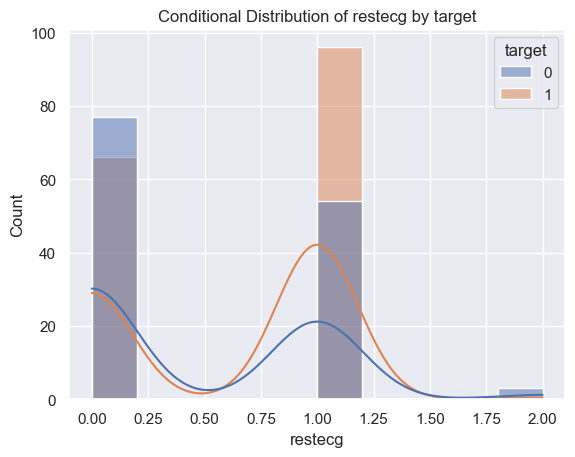

class 0 statistics:
 count    134.000000
mean       0.447761
std        0.542442
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64
class 1 statistics:
 count    163.000000
mean       0.601227
std        0.503566
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64
t-test p-value: 0.012132387403517185
--------------------------------------------------------------------------


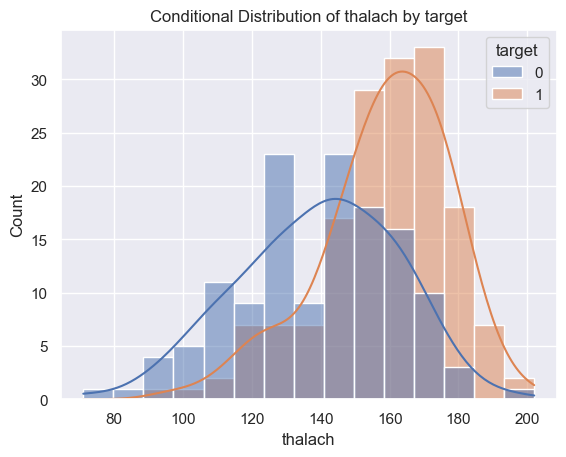

class 0 statistics:
 count    134.000000
mean     139.186567
std       22.747112
min       71.000000
25%      125.000000
50%      142.000000
75%      156.750000
max      195.000000
Name: thalach, dtype: float64
class 1 statistics:
 count    163.000000
mean     158.723926
std       18.985468
min       96.000000
25%      149.000000
50%      162.000000
75%      172.000000
max      202.000000
Name: thalach, dtype: float64
t-test p-value: 1.813220064493624e-14
--------------------------------------------------------------------------


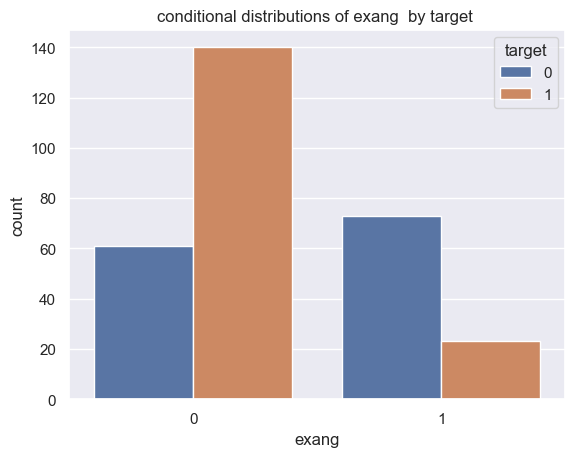

--------------------------------------------------------------------------


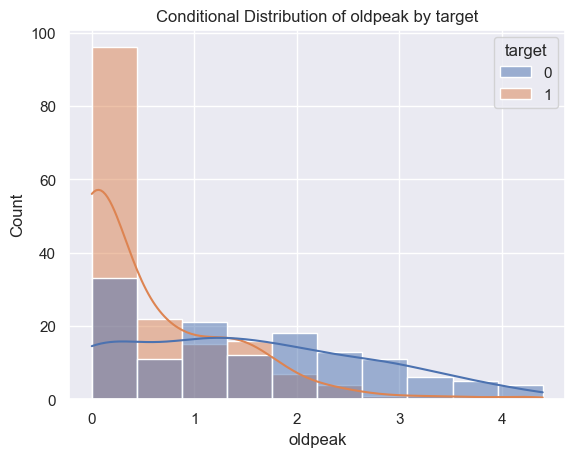

class 0 statistics:
 count    134.000000
mean       1.507463
std        1.186555
min        0.000000
25%        0.525000
50%        1.400000
75%        2.400000
max        4.400000
Name: oldpeak, dtype: float64
class 1 statistics:
 count    163.000000
mean       0.580368
std        0.780065
min        0.000000
25%        0.000000
50%        0.200000
75%        1.000000
max        4.200000
Name: oldpeak, dtype: float64
t-test p-value: 1.7106919874789572e-14
--------------------------------------------------------------------------


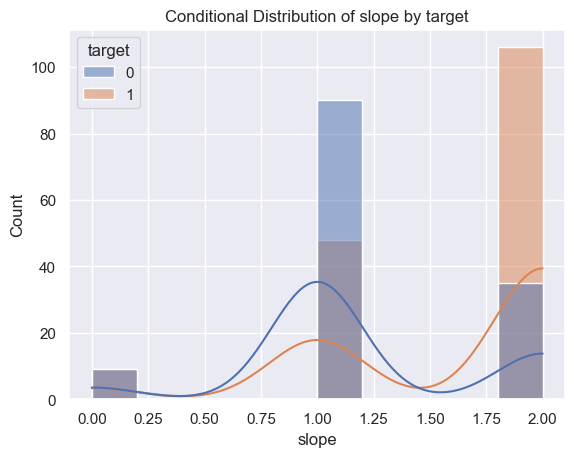

class 0 statistics:
 count    134.000000
mean       1.194030
std        0.541199
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64
class 1 statistics:
 count    163.000000
mean       1.595092
std        0.594606
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64
t-test p-value: 5.117473766850474e-09
--------------------------------------------------------------------------


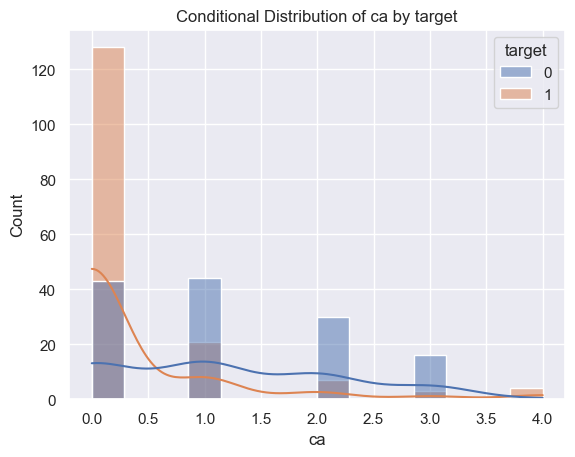

class 0 statistics:
 count    134.000000
mean       1.164179
std        1.034692
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: ca, dtype: float64
class 1 statistics:
 count    163.000000
mean       0.368098
std        0.853150
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: ca, dtype: float64
t-test p-value: 3.2897213704718795e-12
--------------------------------------------------------------------------


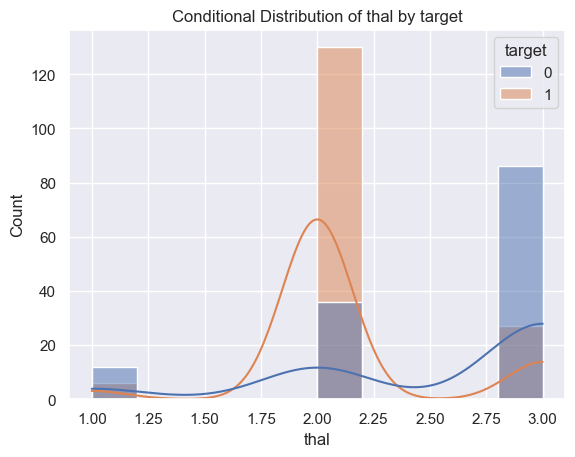

class 0 statistics:
 count    134.000000
mean       2.552239
std        0.655425
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64
class 1 statistics:
 count    163.000000
mean       2.128834
std        0.432438
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: thal, dtype: float64
t-test p-value: 1.2631390285881954e-10
--------------------------------------------------------------------------


In [49]:
import seaborn as sns
from scipy.stats import ttest_ind
class_0_data = data_without_outliers[data_without_outliers['target']==0]
class_1_data = data_without_outliers[data_without_outliers['target']==1]

for column in  data_without_outliers.columns:
  #checking if the column is not the target column
  if column != 'target':

    quantitative , categorical = quant_vs_cat(data_without_outliers)
    #data is categorial
    if column in categorical:
      sns.countplot(data=data_without_outliers, x=column, hue='target')
      plt.title(f'conditional distributions of {column}  by target ' )
      plt.show()
      print("--------------------------------------------------------------------------")
    else:
      #data is quantitative
      sns.histplot(data=data_without_outliers, x=column, hue='target', kde=True)
      plt.title(f'Conditional Distribution of {column} by target')
      plt.show()

      #statistics of class 0 and class 1
      class_0 = class_0_data[column]
      class_1 = class_1_data[column]
      print(f'class 0 statistics:\n {class_0.describe()}')
      print(f'class 1 statistics:\n {class_1.describe()}')
      # t-statistic and p-value
      t_stat, p_value = ttest_ind(class_0, class_1)
      print(f"t-test p-value: {p_value}")
      print("--------------------------------------------------------------------------")




## Converting continous to discrete

In [50]:
data_without_outliers["cat_age"]= pd.cut(data_without_outliers["age"].values, bins = 5, labels=[0,1,2,3,4])
data_without_outliers[ "cat_cp"]= pd.cut(data_without_outliers["cp"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers[ "cat_trestbps"] = pd.cut(data_without_outliers["trestbps"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers["cat_chol"]= pd.cut(data_without_outliers["chol"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers[ "cat_restecg"]= pd.cut(data_without_outliers["restecg"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers[ "cat_thalach"] = pd.cut(data_without_outliers["thalach"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers["cat_oldpeak"]= pd.cut(data_without_outliers["oldpeak"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers[ "cat_slope"]= pd.cut(data_without_outliers["slope"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers[ "cat_ca"] = pd.cut(data_without_outliers["ca"].values, bins = 5, labels = [0,1,2,3,4])
data_without_outliers[ "cat_thal"] = pd.cut(data_without_outliers["thal"].values, bins = 5, labels = [0,1,2,3,4])



data_without_outliers = data_without_outliers.drop(columns = ["age", "cp", "trestbps", "chol", "restecg", "thalach", "oldpeak", "slope", "ca", "thal"])
data_without_outliers = data_without_outliers[["cat_age", "cat_cp", "cat_trestbps", "cat_chol", "cat_restecg", "cat_thalach", "cat_oldpeak", "cat_slope", "cat_ca", "cat_thal","target"]]
data_without_outliers.head (10)



C:\Users\Mohamed\AppData\Local\Temp\ipykernel_4576\2823620159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers["cat_age"]= pd.cut(data_without_outliers["age"].values, bins = 5, labels=[0,1,2,3,4])
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_4576\2823620159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers[ "cat_cp"]= pd.cut(data_without_outliers["cp"].values, bins = 5, labels = [0,1,2,3,4])
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_4576\2823620159.py:3:

,cat_age,cat_cp,cat_trestbps,cat_chol,cat_restecg,cat_thalach,cat_oldpeak,cat_slope,cat_ca,cat_thal,target
0,3,4,2,1,0,3,2,0,0,0,1
1,0,3,1,2,2,4,3,0,0,2,1
2,1,1,1,1,0,3,1,4,0,2,1
3,2,1,1,1,2,4,0,4,0,2,1
4,2,0,1,3,2,3,0,4,0,2,1
5,2,0,2,1,2,2,0,2,0,0,1
6,2,1,2,2,0,3,1,2,0,2,1
7,1,1,1,2,2,3,0,4,0,4,1
8,2,3,3,1,2,3,0,4,0,4,1
9,2,3,2,0,2,3,1,4,0,2,1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score



sed_f1 = []
sed_accuracy = []


# Split the data into training and test sets
train, test = train_test_split(data_without_outliers, test_size=0.2, random_state=53)

X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Create a Gaussian Naive Bayes classifier and fit it to the training data
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

# Predict the target variable for the test data
Y_pred = naive_bayes.predict(X_test)

# Evaluate the classifier's performance
print ("Confusion Matrix is " ,confusion_matrix(Y_test, Y_pred))
print ("F1 score is " ,f1_score(Y_test, Y_pred))
print("Accuracy score is " ,accuracy_score(Y_test, Y_pred))


Confusion Matrix is  [[25  7]
 [ 1 27]]
F1 score is  0.8709677419354839
Accuracy score is  0.8666666666666667


In [52]:
import numpy as np

def naive_bayes_categorical(df, X, Y):
    # get feature name
    features = list(df.columns)[:-1]

    # calculate prior
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y] == i]) / len(df))

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calc likelihood
        labels = sorted(list(df[Y].unique()))  #labels contains the unique values of the target (in our case : 0,1)
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            df_filtered = df[df[Y] == labels[j]]
            for i in range(len(features)):
              #features[i] is a list contain name of all features , x[i] contains the values of features
                p_x_given_y = len(df_filtered[df_filtered[features[i]] == x[i]]) / len(df_filtered)
                likelihood[j] *= p_x_given_y

        # calc posterior probability (numeretal only)
        post_prop = [1] * len(labels)
        for j in range(len(labels)):
            post_prop[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prop))  #arg max return index of max which is the predicted y

    return np.array(Y_pred)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# for rn in range(200):
train, test = train_test_split(data_without_outliers, test_size=0.2, random_state=53)

X_test= test.iloc[:,: -1].values #select all rows and all columns exepct the last one
Y_test= test.iloc[:,-1].values   #select all rows of the last column
Y_pred = naive_bayes_categorical(train, X=X_test, Y="target")


print ("Confusion Matrix is " ,confusion_matrix(Y_test, Y_pred))
print ("F1 score is " ,f1_score(Y_test, Y_pred))
print("Accuracy score is " ,accuracy_score(Y_test, Y_pred))


Confusion Matrix is  [[29  3]
 [ 0 28]]
F1 score is  0.9491525423728813
Accuracy score is  0.95


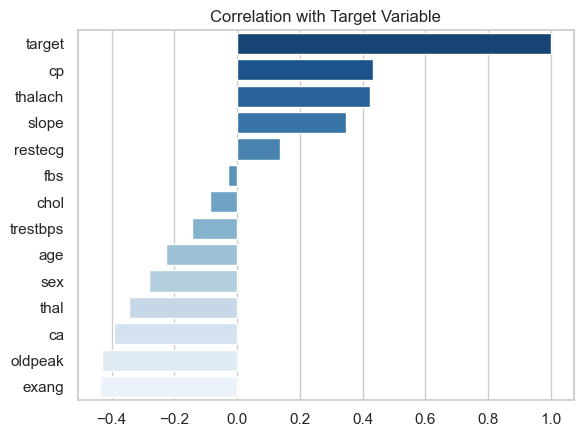

In [54]:
# Calculate the correlation matrix between features and target
corr_with_target = data.corrwith(data["target"], method="pearson")

# Sort the correlation values in descending order
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot a bar chart of the correlation values with the target
sns.set(style="whitegrid")
ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="Blues_r")
ax.set_title("Correlation with Target Variable")
plt.show()